Forecasting of partition datasets in route ../dataset/partitions
Target: averaged_queue_time_per_job
Book source: Timeseries forecasting in Python (Manning)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Analysis of medium partition
Based on techniques from book Python Data Science Essentials and Timeseries forecasting in Python

In [2]:
medium_df = pd.read_csv("../dataset/partitions/medium_partition.csv")
medium_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date,2907.0,1.681567e+09,264503.978524,1.681117e+09,1.681341e+09,1.681562e+09,1.681785e+09,1.682067e+09
availability,2907.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
avg_alloc_mem,2907.0,1.204111e+05,17483.228132,7.697429e+04,1.059050e+05,1.194400e+05,1.354903e+05,1.688000e+05
avg_allocated_cpus_per_job,2907.0,7.533300e+02,148.429907,4.410237e+02,6.230638e+02,7.477361e+02,8.619719e+02,1.123797e+03
avg_allocated_nodes_per_job,2907.0,2.942695e+00,0.579804,1.722749e+00,2.433843e+00,2.920844e+00,3.367078e+00,4.389831e+00
avg_cpus_load_lower,2907.0,4.542350e+01,17.404582,0.000000e+00,3.328000e+01,4.405333e+01,5.707029e+01,1.738967e+02
avg_cpus_load_upper,2907.0,1.319634e+02,52.804867,5.994000e+01,9.718000e+01,1.133900e+02,1.485533e+02,3.377600e+02
avg_execution_time_per_job,2907.0,5.374966e+04,12526.187749,2.114197e+04,4.410989e+04,5.347724e+04,6.302716e+04,1.071112e+05
avg_free_mem_lower,2907.0,1.750444e+05,16502.883473,7.312750e+04,1.661032e+05,1.785488e+05,1.857589e+05,2.059942e+05
avg_free_mem_upper,2907.0,2.295526e+05,9153.499389,1.927495e+05,2.228622e+05,2.290420e+05,2.375682e+05,2.489415e+05


In [3]:
# 1- convert date to time index
medium_df['date'] = pd.to_datetime(medium_df['date'].astype(np.int64), unit='s') 
medium_df.set_index('date', inplace=True)
# 2- remove features with no variance
filter = medium_df.std() == 0
features_to_drop = medium_df.columns[filter]
medium_df.drop(features_to_drop, axis=1, inplace=True)
medium_df.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
avg_alloc_mem,2907.0,120411.057794,17483.228132,76974.285714,105905.000000,119440.000000,135490.285714,168800.000000
avg_allocated_cpus_per_job,2907.0,753.330036,148.429907,441.023697,623.063785,747.736148,861.971851,1123.796610
avg_allocated_nodes_per_job,2907.0,2.942695,0.579804,1.722749,2.433843,2.920844,3.367078,4.389831
avg_cpus_load_lower,2907.0,45.423498,17.404582,0.000000,33.280000,44.053333,57.070286,173.896667
avg_cpus_load_upper,2907.0,131.963401,52.804867,59.940000,97.180000,113.390000,148.553333,337.760000
avg_execution_time_per_job,2907.0,53749.655102,12526.187749,21141.968944,44109.890100,53477.244980,63027.162126,107111.226316
avg_free_mem_lower,2907.0,175044.364796,16502.883473,73127.500000,166103.166667,178548.833333,185758.857143,205994.250000
avg_free_mem_upper,2907.0,229552.567433,9153.499389,192749.500000,222862.166667,229042.000000,237568.214286,248941.500000
avg_maximum_allocated_cpus_per_job,2907.0,641.930566,103.553341,397.665653,557.948718,625.180812,726.262527,888.784314
avg_maximum_allocated_nodes_per_job,2907.0,2.942695,0.579804,1.722749,2.433843,2.920844,3.367078,4.389831


Our target is to forecast the avg_queue_time_per_job based on other features in dataset

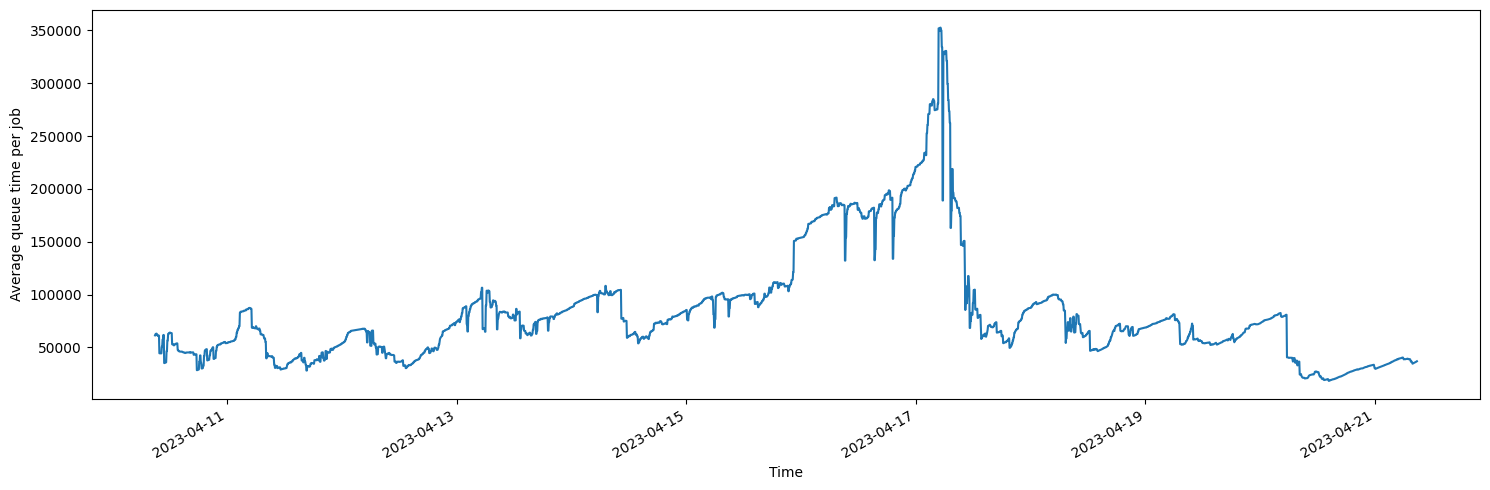

In [4]:
avg_job_queue_time = medium_df['avg_queue_time_per_job']
time_index = medium_df.index
fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Average queue time per job")
fig.set_size_inches(15, 5)
ax.plot(time_index, avg_job_queue_time)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [6]:
def determine_dropped_colums(df: pd.core.frame.DataFrame, df_selected: np.ndarray):
    original_columns = df.columns
    dropped_columns = []
    index = -1
    for value in df.iloc[0]:
        index += 1
        if value not in df_selected[0]:
            dropped_columns.append(original_columns[index])
    return dropped_columns

Feature selection: drop features with low variance

In [7]:
from sklearn.feature_selection import VarianceThreshold
medium_df_selected = VarianceThreshold(threshold=1.0).fit_transform(medium_df)
dropped_columns = determine_dropped_colums(medium_df, medium_df_selected)
old_columns = medium_df.columns
new_columns = old_columns.drop(dropped_columns)
medium_df_selected = pd.DataFrame(medium_df_selected, columns=new_columns, index=medium_df.index)
medium_df_selected.describe().transpose()
# These columns should have been removed from dataset: avg_allocated_nodes_per_job, avg_maximum_allocated_nodes_per_job, avg_minimum_requested_nodes_per_job

,count,mean,std,min,25%,50%,75%,max
avg_alloc_mem,2907.0,120411.057794,17483.228132,76974.285714,105905.000000,119440.000000,135490.285714,168800.000000
avg_allocated_cpus_per_job,2907.0,753.330036,148.429907,441.023697,623.063785,747.736148,861.971851,1123.796610
avg_cpus_load_lower,2907.0,45.423498,17.404582,0.000000,33.280000,44.053333,57.070286,173.896667
avg_cpus_load_upper,2907.0,131.963401,52.804867,59.940000,97.180000,113.390000,148.553333,337.760000
avg_execution_time_per_job,2907.0,53749.655102,12526.187749,21141.968944,44109.890100,53477.244980,63027.162126,107111.226316
avg_free_mem_lower,2907.0,175044.364796,16502.883473,73127.500000,166103.166667,178548.833333,185758.857143,205994.250000
avg_free_mem_upper,2907.0,229552.567433,9153.499389,192749.500000,222862.166667,229042.000000,237568.214286,248941.500000
avg_maximum_allocated_cpus_per_job,2907.0,641.930566,103.553341,397.665653,557.948718,625.180812,726.262527,888.784314
avg_minimum_requested_cpus_per_job,2907.0,114.200666,12.391759,69.795455,106.023517,118.568093,121.879547,139.260536
avg_minimum_requested_memory_per_job,2907.0,228833.477187,16755.996959,130424.316109,232367.384735,236215.969582,237725.517241,239915.587530


Split dataset into train, validation and test

In [8]:
X_columns = medium_df_selected.columns.drop("avg_queue_time_per_job")
X = medium_df_selected[X_columns]
y = medium_df_selected["avg_queue_time_per_job"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
n = len(medium_df_selected)
train_df = medium_df_selected[0:int(0.7*n)] # 70% 
val_df = medium_df_selected[int(0.7*n):int(0.9*n)] # 20%
test_df = medium_df_selected[int(0.9*n):] # 10%

Scale dataset to range [0, 1] for better ML model performance and lower training time

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df)
columns = train_df.columns
index = train_df.index
train_df = pd.DataFrame(scaler.transform(train_df[train_df.columns]), columns=train_df.columns, index=train_df.index)
val_df = pd.DataFrame(scaler.transform(val_df[val_df.columns]), columns=val_df.columns, index=val_df.index)
test_df = pd.DataFrame(scaler.transform(test_df[test_df.columns]), columns=test_df.columns, index=test_df.index)

Data windowing
Code taken from TimeSeries Forecasting in Python: https://github.com/marcopeix/TimeSeriesForecastingInPython/blob/master/CH13%26CH14/CH13%20%26%20CH14.ipynb

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
class DataWindow():
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, test_df=test_df, 
                 label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='avg_queue_time_per_job', max_subplots=3):
        inputs, labels = self.sample_batch
        
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
        
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

1- Defining baseline models (for performance comparison)

In [13]:
from keras import Model, Sequential

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError

from keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

1.1- Single-step baseline model

In [15]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['avg_queue_time_per_job'])
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['avg_queue_time_per_job'])

In [16]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        
        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)
        
        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

In [17]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}
baseline_last = Baseline(label_index=column_indices['avg_queue_time_per_job'])
baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [18]:
val_performance = {}
performance = {}

val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

19/19 [==============================] - 0s 3ms/step - loss: 6.3453e-05 - mean_absolute_error: 0.0028


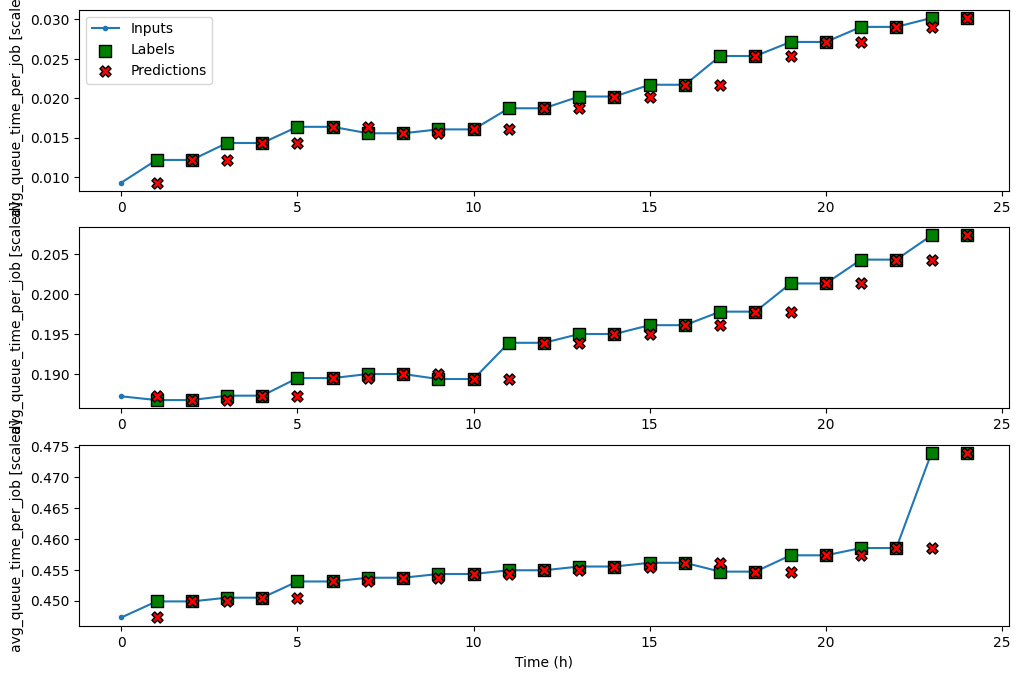

In [19]:
wide_window.plot(baseline_last)

In [20]:
print(performance['Baseline - Last'][1])

0.0017316513694822788


1.2- Multi-step baseline models

In [21]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['avg_queue_time_per_job'])

1.2.1- Predicting the last known value

In [22]:
class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return tf.tile(inputs[:, -1:, :], [1, 24, 1])
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 24, 1])

In [23]:
ms_baseline_last = MultiStepLastBaseline(label_index=column_indices['avg_queue_time_per_job'])
ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
ms_val_performance = {}
ms_performance = {}
ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.3114 - mean_absolute_error: 0.4599


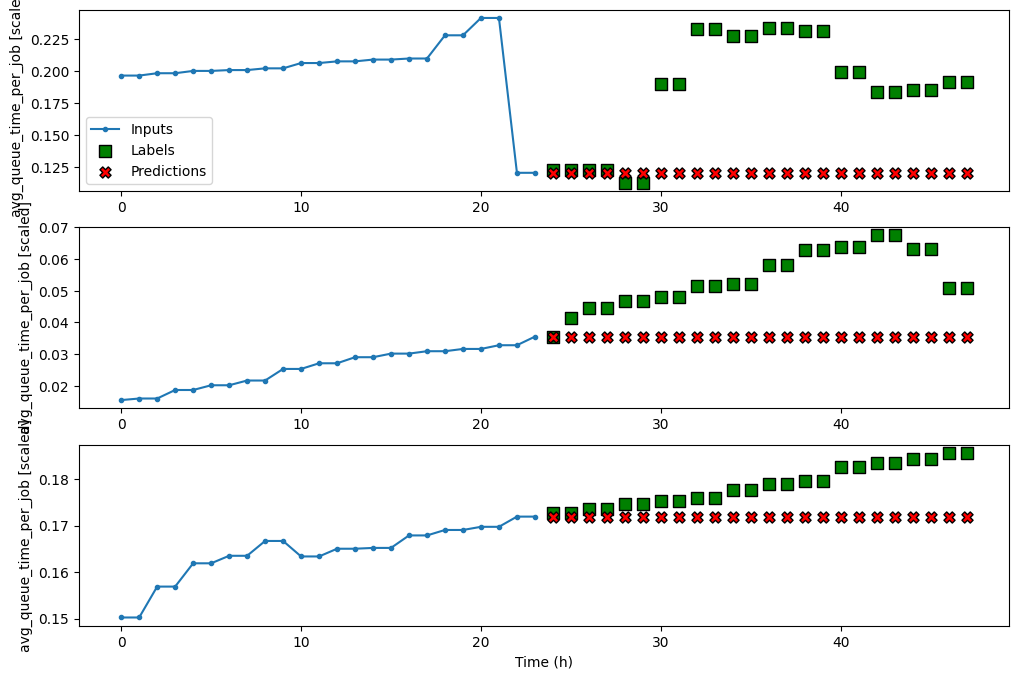

In [24]:
multi_window.plot(ms_baseline_last)

In [25]:
print(ms_performance['Baseline - Last'][1])

0.5721400380134583


1.2.2- Repeating the intut sequence

In [26]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        return inputs[:, :, self.label_index:]

In [27]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['avg_queue_time_per_job'])
ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.3116 - mean_absolute_error: 0.4615


0.5749790668487549


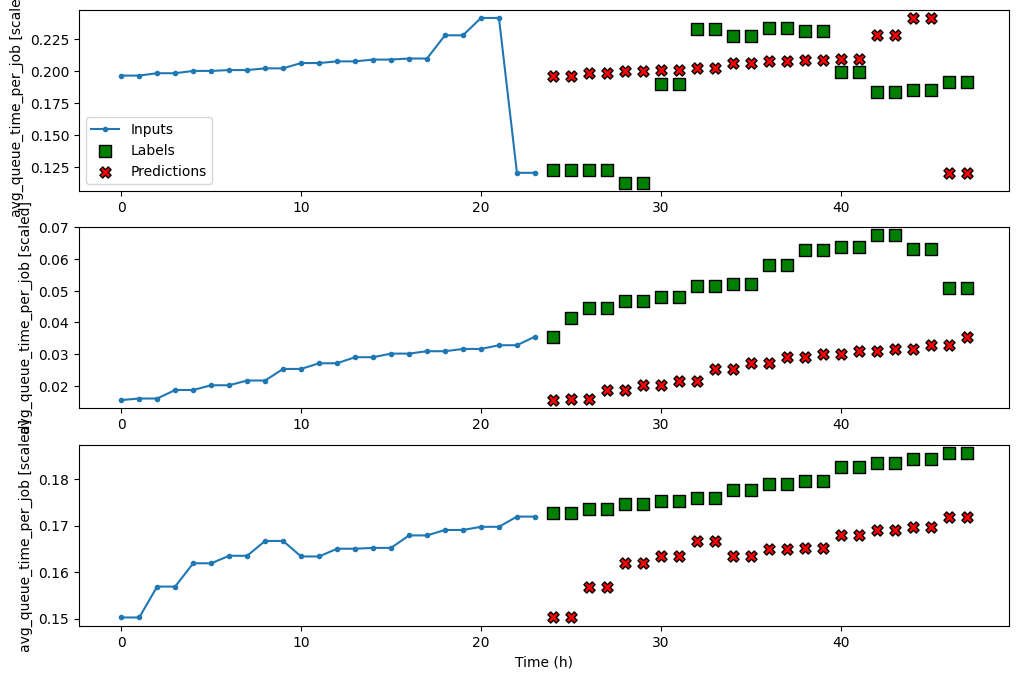

In [28]:
multi_window.plot(ms_baseline_repeat)
print(ms_performance['Baseline - Repeat'][1])

2- Linear model

In [29]:
def compile_and_fit(model, window, patience=3, max_epochs=100):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')
    
    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])
    
    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])
    
    return history

2.1- Single step linear model

In [30]:
ss_linear_model = Sequential(
    [
        Dense(units=1) # Number of units is output layer == number of output classes
    ]
)


In [31]:
history = compile_and_fit(model=ss_linear_model,window=single_step_window)
val_performance['Linear'] = ss_linear_model.evaluate(single_step_window.val)
performance['Linear'] = ss_linear_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 0.1101 - mean_absolute_error: 0.2675 - val_loss: 0.0322 - val_mean_absolute_error: 0.1584
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0810 - mean_absolute_error: 0.2311 - val_loss: 0.0222 - val_mean_absolute_error: 0.1298
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0620 - mean_absolute_error: 0.2059 - val_loss: 0.0148 - val_mean_absolute_error: 0.1040
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0487 - mean_absolute_error: 0.1841 - val_loss: 0.0120 - val_mean_absolute_error: 0.0923
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0392 - mean_absolute_error: 0.1653 - val_loss: 0.0085 - val_mean_absolute_error: 0.0749
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0318 - mean_absolute_error: 0.1486 - val_loss: 0.0068 - val_mean_absolute_error: 0.0652
Epoch 7/100
64/64 [===

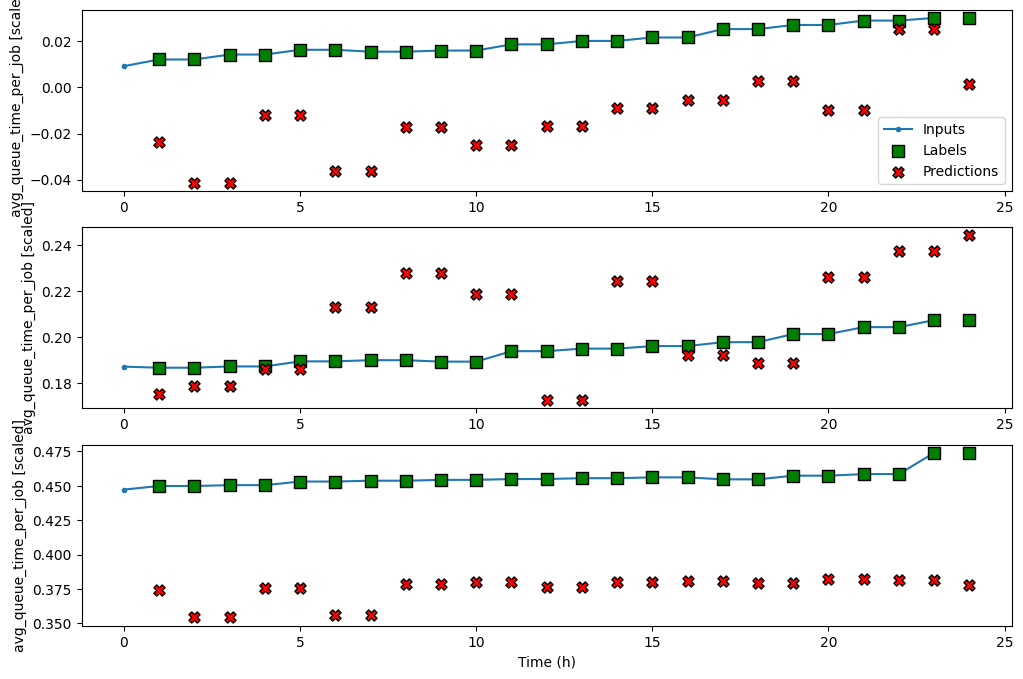

In [32]:
wide_window.plot(ss_linear_model)

In [33]:
print('Single step Performance:')
for index, key in enumerate(performance):
    print(key + ": " + str(performance[key][1]))
print('Single step Validation Performance:')
for index, key in enumerate(val_performance):
    print(key + ": " + str(val_performance[key][1]))

Single step Performance:
Baseline - Last: 0.0017316513694822788
Linear: 0.06173912063241005
Single step Validation Performance:
Baseline - Last: 0.0027847832534462214
Linear: 0.05730430409312248


2.2- Multistep linear model

In [34]:
ms_linear_model = Sequential(
    [
        Dense(units=1, kernel_initializer=tf.initializers.zeros)
    ]
)

In [36]:
history = compile_and_fit(model=ms_linear_model,window=multi_window)
ms_val_performance["Linear"] = ms_linear_model.evaluate(multi_window.val)
ms_performance["Linear"] = ms_linear_model.evaluate(multi_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0688 - val_loss: 0.0023 - val_mean_absolute_error: 0.0386
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0073 - mean_absolute_error: 0.0638 - val_loss: 0.0029 - val_mean_absolute_error: 0.0430
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0066 - mean_absolute_error: 0.0604 - val_loss: 0.0032 - val_mean_absolute_error: 0.0449
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0434


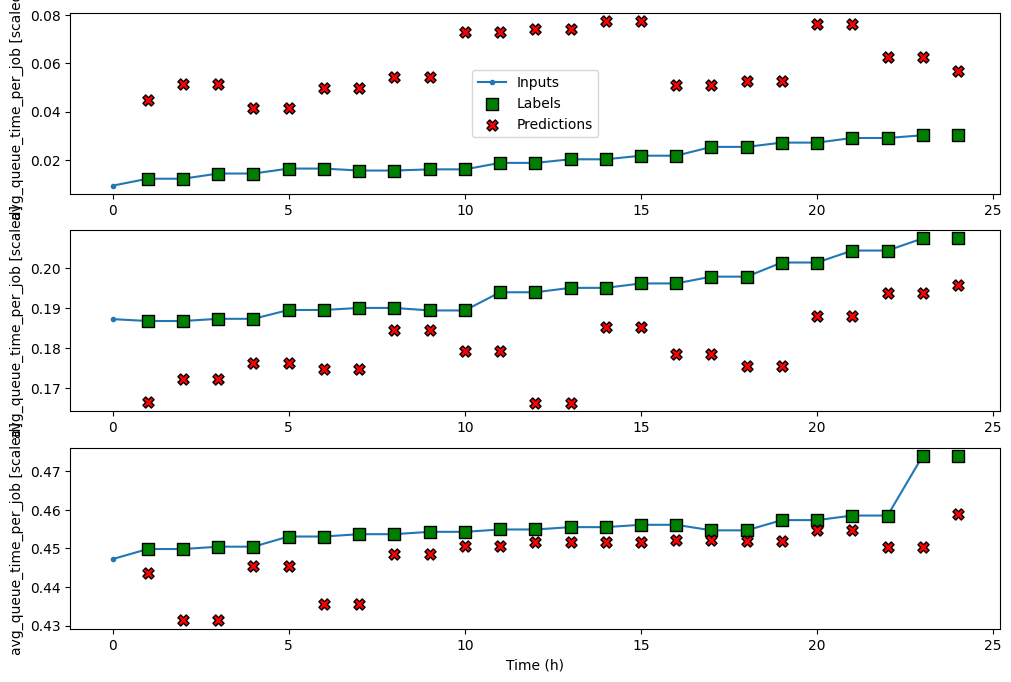

In [63]:
wide_window.plot(ms_linear_model)

In [37]:
print('Multistep Performance:')
for index, key in enumerate(ms_performance):
    print(key + ": " + str(ms_performance[key][1]))
print('Multistep Validation Performance:')
for index, key in enumerate(ms_val_performance):
    print(key + ": " + str(ms_val_performance[key][1]))

Multistep Performance:
Baseline - Last: 0.5721400380134583
Baseline - Repeat: 0.5749790668487549
Linear: 0.07067275792360306
Multistep Validation Performance:
Baseline - Last: 0.459896981716156
Baseline - Repeat: 0.4614982306957245
Linear: 0.04343337193131447


3- Deep Neural (DNN) model 

3.2- Single step DNN model

In [38]:
ss_dnn_model = Sequential(
    [
        Dense(units=64, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=1)
    ]
)

In [39]:
history = compile_and_fit(model=ss_dnn_model, window=single_step_window)
val_performance['DNN'] = ss_dnn_model.evaluate(single_step_window.val)
performance['DNN'] = ss_dnn_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
64/64 [==============================] - 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0964 - val_loss: 0.0028 - val_mean_absolute_error: 0.0425
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0291 - val_loss: 0.0035 - val_mean_absolute_error: 0.0480
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0012 - mean_absolute_error: 0.0221 - val_loss: 0.0028 - val_mean_absolute_error: 0.0441
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_absolute_error: 0.0199 - val_loss: 0.0052 - val_mean_absolute_error: 0.0568
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 8.6943e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0024 - val_mean_absolute_error: 0.0398
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 8.0937e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0022 - val_mean_absolute_error: 0.0385
Epoch 7/100
64

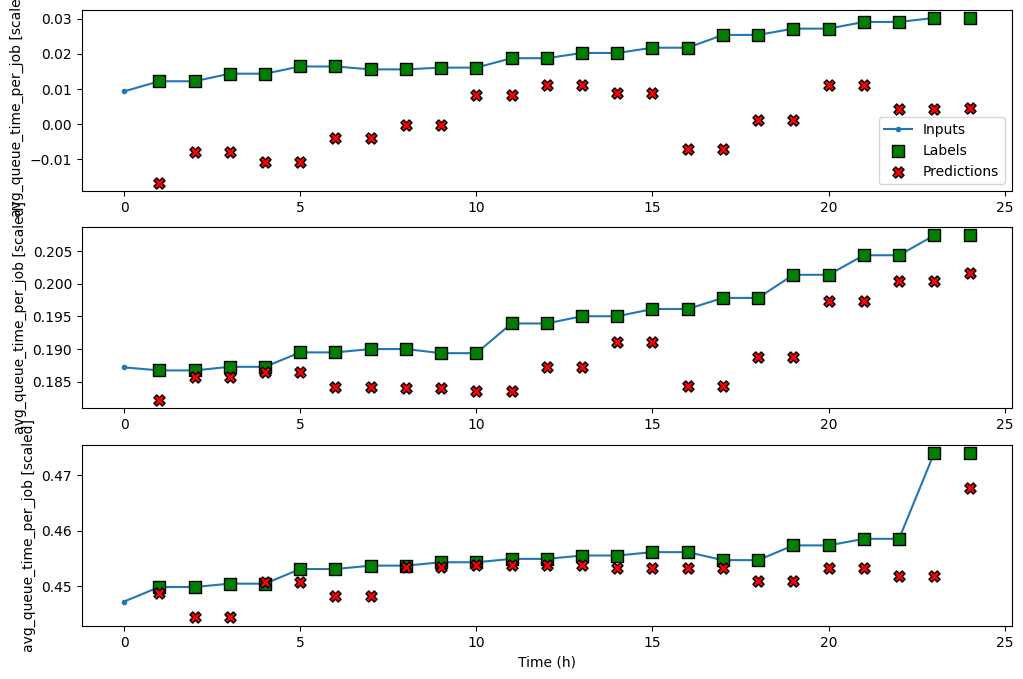

In [40]:
wide_window.plot(ss_dnn_model)

In [41]:
print('Single step Performance:')
for index, key in enumerate(performance):
    print(key + ": " + str(performance[key][1]))
print('Single step Validation Performance:')
for index, key in enumerate(val_performance):
    print(key + ": " + str(val_performance[key][1]))

Single step Performance:
Baseline - Last: 0.0017316513694822788
Linear: 0.06173912063241005
DNN: 0.038652848452329636
Single step Validation Performance:
Baseline - Last: 0.0027847832534462214
Linear: 0.05730430409312248
DNN: 0.03168950229883194


3.3- Multistep DNN model

In [42]:
ms_dnn_model = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

In [43]:
history = compile_and_fit(model=ms_dnn_model, window=multi_window)
ms_val_performance['DNN'] = ms_dnn_model.evaluate(multi_window.val)
ms_performance['DNN'] = ms_dnn_model.evaluate(multi_window.test, verbose=0)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_error: 0.1177 - val_loss: 0.0053 - val_mean_absolute_error: 0.0645
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0554 - val_loss: 0.0021 - val_mean_absolute_error: 0.0370
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0435 - val_loss: 0.0023 - val_mean_absolute_error: 0.0384
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0376 - val_loss: 0.0022 - val_mean_absolute_error: 0.0381
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0340 - val_loss: 0.0020 - val_mean_absolute_error: 0.0351
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0322 - val_loss: 0.0018 - val_mean_absolute_error: 0.0343
Epoch 7/100
63/63 [===

In [44]:
print('Multistep Performance:')
for index, key in enumerate(ms_performance):
    print(key + ": " + str(ms_performance[key][1]))
print('Multistep Validation Performance:')
for index, key in enumerate(ms_val_performance):
    print(key + ": " + str(ms_val_performance[key][1]))

Multistep Performance:
Baseline - Last: 0.5721400380134583
Baseline - Repeat: 0.5749790668487549
Linear: 0.07067275792360306
DNN: 0.0965808629989624
Multistep Validation Performance:
Baseline - Last: 0.459896981716156
Baseline - Repeat: 0.4614982306957245
Linear: 0.04343337193131447
DNN: 0.03641278296709061


In [45]:
def plot_performance(performance, val_performance, low_ylim=0.0, high_ylim=1.0, title=''):
    ms_mae_val = [v[1] for v in val_performance.values()]
    ms_mae_test = [v[1] for v in performance.values()]
    x = np.arange(len(performance))
    fig, ax = plt.subplots()
    ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
    ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
    ax.set_ylabel('Mean absolute error')
    ax.set_xlabel('Models')
    for index, value in enumerate(ms_mae_val):
        plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    for index, value in enumerate(ms_mae_test):
        plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    plt.ylim(low_ylim, high_ylim)
    plt.xticks(ticks=x, labels=performance.keys())
    plt.legend(loc='best')
    plt.title(title)
    plt.tight_layout()




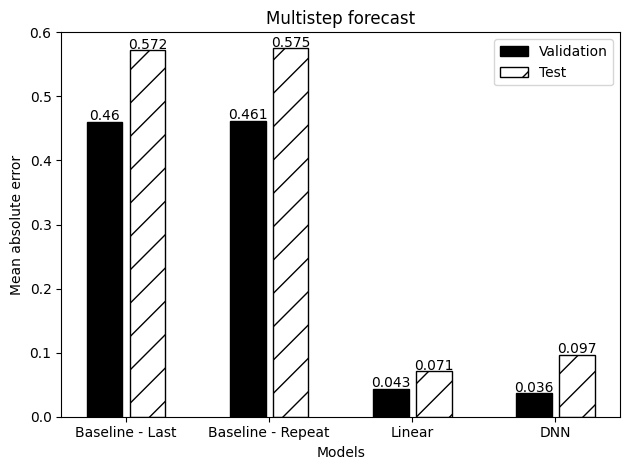

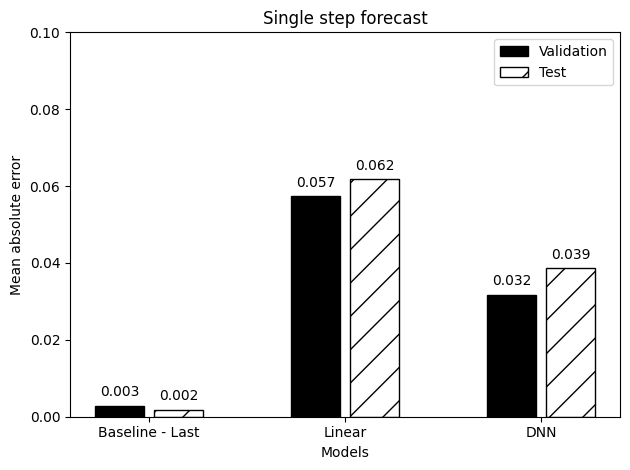

In [47]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')

4- Long short term memory (LSTM) model 

4.1 LSTM single step model

In [48]:
ss_lstm_model = Sequential([
    LSTM(units=32, return_sequences=True),
    Dense(units=1)
])

In [51]:
history = compile_and_fit(model=ss_lstm_model, window=single_step_window)
val_performance['LSTM'] = ss_lstm_model.evaluate(single_step_window.val)
performance['LSTM'] = ss_lstm_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
64/64 [==============================] - 3s 12ms/step - loss: 5.5484e-04 - mean_absolute_error: 0.0113 - val_loss: 1.2070e-04 - val_mean_absolute_error: 0.0078
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 5.2280e-04 - mean_absolute_error: 0.0111 - val_loss: 1.3878e-04 - val_mean_absolute_error: 0.0089
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 4.7375e-04 - mean_absolute_error: 0.0093 - val_loss: 1.1293e-04 - val_mean_absolute_error: 0.0077
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 5.0591e-04 - mean_absolute_error: 0.0098 - val_loss: 1.0135e-04 - val_mean_absolute_error: 0.0069
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 4.6266e-04 - mean_absolute_error: 0.0083 - val_loss: 1.0483e-04 - val_mean_absolute_error: 0.0073
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 4.8039e-04 - mean_absolute_error: 0.0089 - val_loss: 1.3942e-04 - val_m

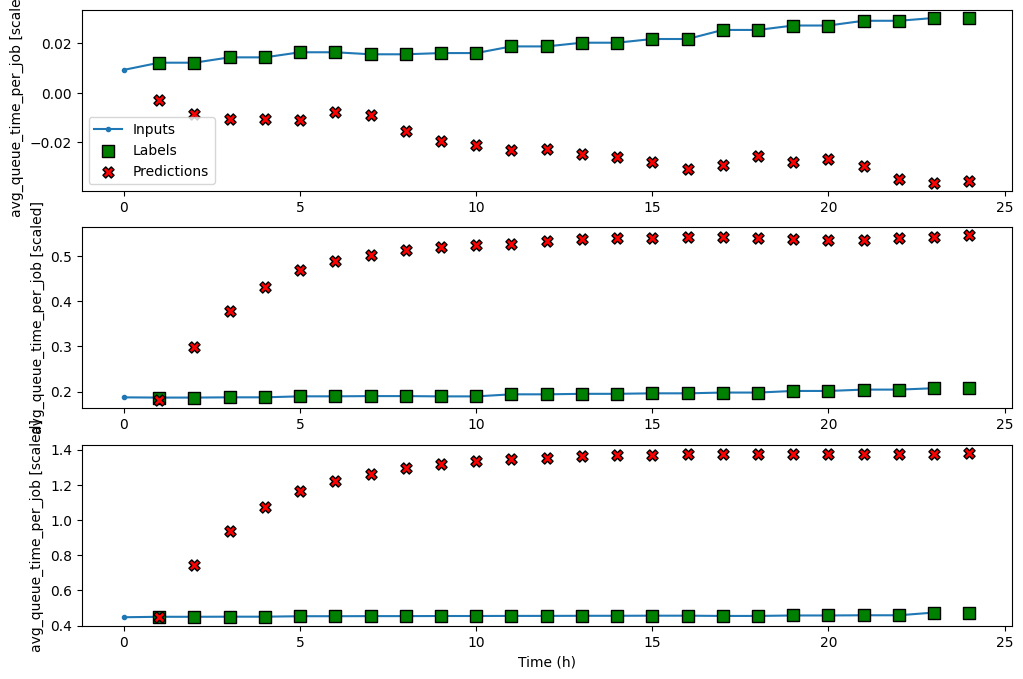

In [52]:
wide_window.plot(ss_lstm_model)

4.1 LSTM multistep model

In [53]:
ms_lstm_model = Sequential([
    LSTM(units=32, return_sequences=True),
    Dense(units=1, kernel_initializer=tf.initializers.zeros),
])

In [59]:
history = compile_and_fit(model=ms_lstm_model, window=single_step_window)
ms_val_performance['LSTM'] = ms_lstm_model.evaluate(single_step_window.val)
ms_performance['LSTM'] = ms_lstm_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
64/64 [==============================] - 2s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0360 - val_loss: 0.0019 - val_mean_absolute_error: 0.0353
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0302 - val_loss: 0.0021 - val_mean_absolute_error: 0.0370
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_absolute_error: 0.0260 - val_loss: 0.0021 - val_mean_absolute_error: 0.0386
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_absolute_error: 0.0225 - val_loss: 0.0018 - val_mean_absolute_error: 0.0350
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 0.0016 - val_mean_absolute_error: 0.0313
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 9.5372e-04 - mean_absolute_error: 0.0187 - val_loss: 0.0013 - val_mean_absolute_error: 0.0287
Epoch 7/100
64/64

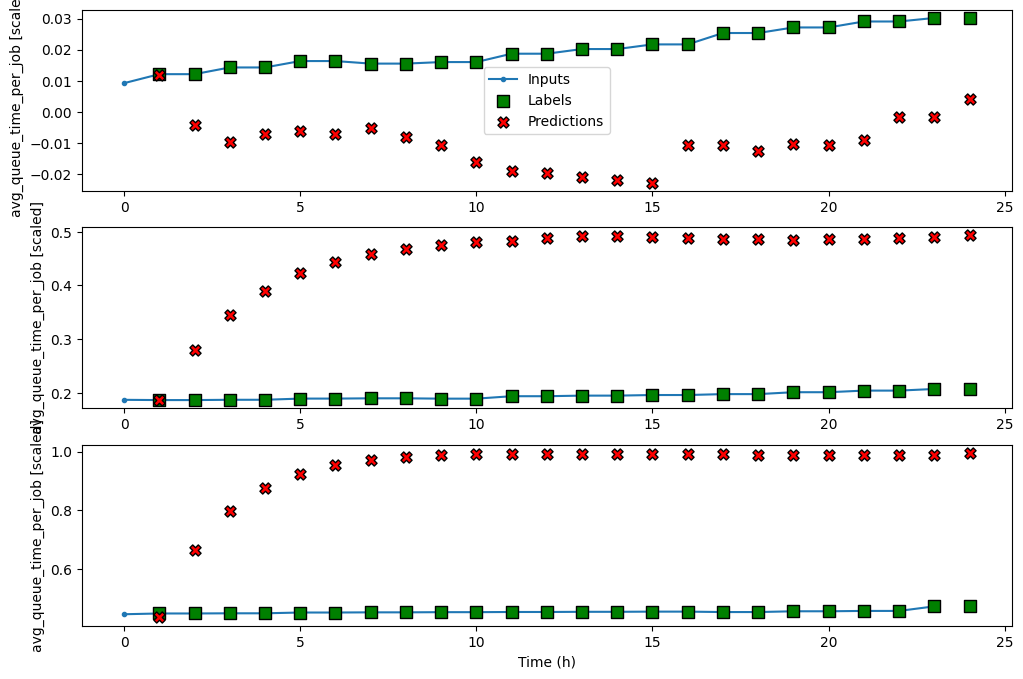

In [62]:
wide_window.plot(ms_lstm_model)

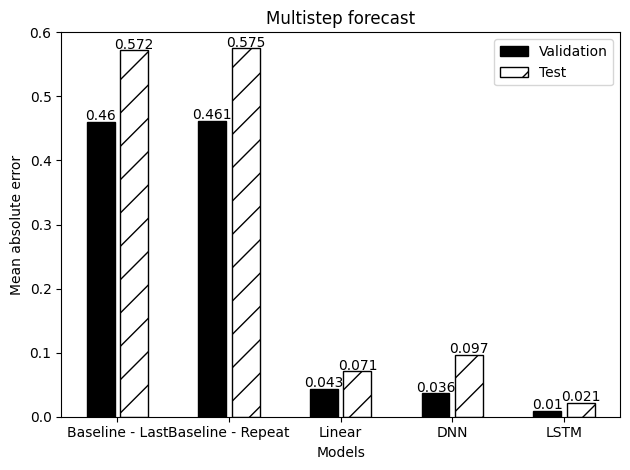

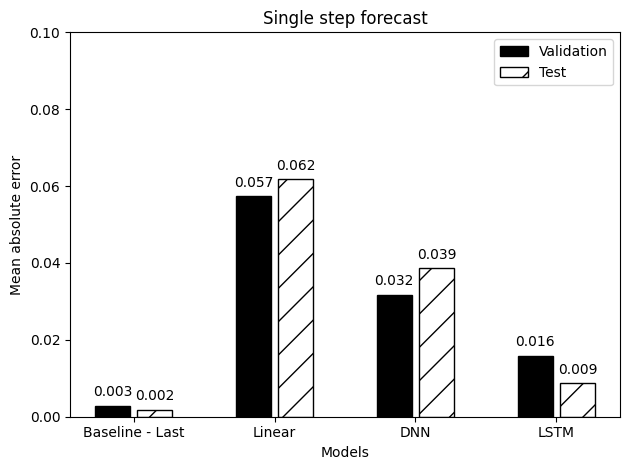

In [61]:
plot_performance(ms_performance, ms_val_performance, high_ylim=0.6, title='Multistep forecast')
plot_performance(performance, val_performance, high_ylim=0.1, title='Single step forecast')